In [91]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID") 
print(f"clinical trial data: {len(clinical_trial_df)}")
print(f"combined data: {len(combined_df)}")
# Display the data table for preview
combined_df.head()


clinical trial data: 1893
combined data: 1906


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Since there are more lines in the combined dataframe than in the original clinical data - look for duplicates
print(f"Lines in Mouse Drug table: {len(mouse_drug_df)}")
print(f"Unique IDs Mouse Drug table: {len(mouse_drug_df.groupby('Mouse ID'))}")
duplicates = mouse_drug_df[mouse_drug_df.duplicated("Mouse ID", keep=False)]
duplicates


Lines in Mouse Drug table: 250
Unique IDs Mouse Drug table: 249


,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [3]:
# Remove duplidate Mouse ID from study data because we don't know which drug the mouse received and that 
# mouse's data could corrupt the results
mouse_drug_cleaned_df = mouse_drug_df.drop_duplicates(subset=["Mouse ID"], keep=False)
# re-do the merge with the cleaned mouse drig data
combined_df = pd.merge(clinical_trial_df, mouse_drug_cleaned_df, on="Mouse ID") 
print(f"combined data: {len(combined_df)}")
combined_df.head()

combined data: 1880


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_volume_df = pd.DataFrame(tumor_volume)
# Preview DataFrame
tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
standard_errors.head()
# Convert to DataFrame
std_err_df = pd.DataFrame(standard_errors)
# Preview DataFrame
std_err_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_summary = tumor_volume_df.pivot_table(index="Timepoint", columns = "Drug",values="Tumor Volume (mm3)")
error_summary = std_err_df.pivot_table(index="Timepoint", columns = "Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked

tumor_summary.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [7]:
#generate list of drug names for plot
drug_list = combined_df["Drug"].unique()
drug_names = []
for x in range(len(drug_list)):
    drug_names.append(drug_list[x])
drug_names

['Capomulin',
 'Ketapril',
 'Naftisol',
 'Infubinol',
 'Stelasyn',
 'Ramicane',
 'Zoniferol',
 'Propriva',
 'Placebo',
 'Ceftamin']

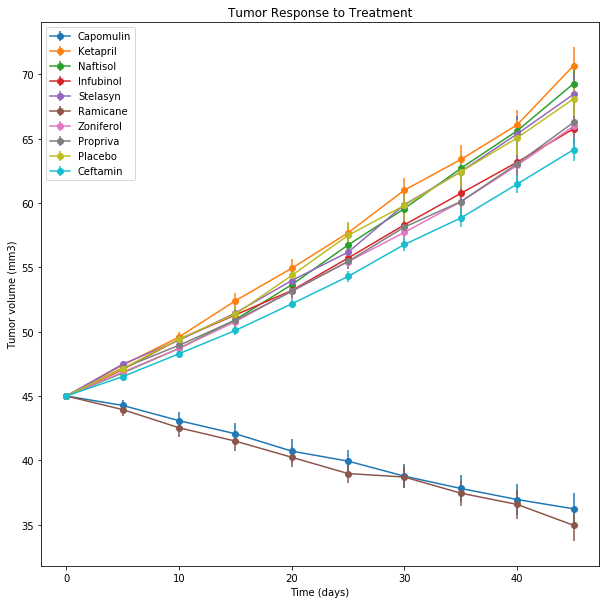

In [8]:
#markers = ["o","v","^","s","*","+","d","8","p","h"]
# Generate the Plot (with Error Bars)
fig, ax1 = plt.subplots(figsize=(10,10))
x_axis1 = np.arange(0, len(tumor_summary)*5, 5)

for x in drug_names:
    ax1.errorbar(x_axis1, tumor_summary[x], error_summary[x], marker = "o")

ax1.set_title("Tumor Response to Treatment")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Tumor volume (mm3)")
ax1.legend(loc="best")
# Save the Figure
plt.savefig("tumor_resp_by_drug.png")


In [9]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_response = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
met_response_df = pd.DataFrame(met_response)
# Preview DataFrame
met_response_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
std_err_met_df = pd.DataFrame(standard_error_met)
# Preview DataFrame
std_err_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_summary = met_response_df.pivot_table(index="Timepoint", columns = "Drug",values="Metastatic Sites")
met_error_summary = std_err_met_df.pivot_table(index="Timepoint", columns = "Drug",values="Metastatic Sites")
# Preview that Reformatting worked
#met_summary.head()
met_error_summary.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


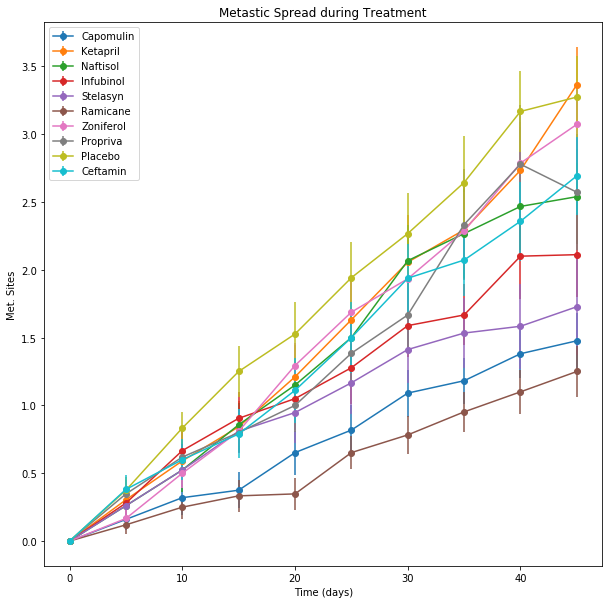

In [13]:
# Generate the Plot (with Error Bars)
fig, ax2 = plt.subplots(figsize=(10,10))
x_axis2 = np.arange(0, len(met_summary)*5, 5)

for x in drug_names:
    ax2.errorbar(x_axis2, met_summary[x], met_error_summary[x], marker = "o")

ax2.set_title("Metastic Spread during Treatment")
ax2.set_xlabel("Time (days)")
ax2.set_ylabel("Met. Sites")
ax2.legend(loc="best")
# Save the Figure
plt.savefig("Met_Spread_by_drug.png")
# Show the Figure
plt.show()

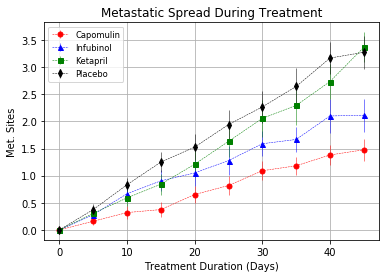

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_rate_df = pd.DataFrame(survival_rate)
survival_rate_df  = survival_rate_df.rename(columns = {"Mouse ID": "Mouse Count"})
# Preview DataFrame
survival_rate_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [31]:
# Minor Data Munging to Re-Format the Data Frames
survival_summary = survival_rate_df.pivot_table(index="Timepoint", columns = "Drug",values="Mouse Count")
# Preview that Reformatting worked
survival_summary.head()

#find starting number of mice by extracting the first line of the df
mouse_start = survival_summary.iloc[0,:]

#create survival rate data frame
survival_rate_pct = survival_summary
for x in drug_names:
    survival_rate_pct[x] = round(100*survival_summary[x]/mouse_start[x], 1)

survival_rate_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,95.8,100.0,95.8,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,87.5,96.0,87.5,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,62.5,96.0,87.5,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,62.5,92.0,79.2,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.2,92.0,75.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,70.8,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,37.5,84.0,62.5,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,37.5,80.0,50.0,56.0


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


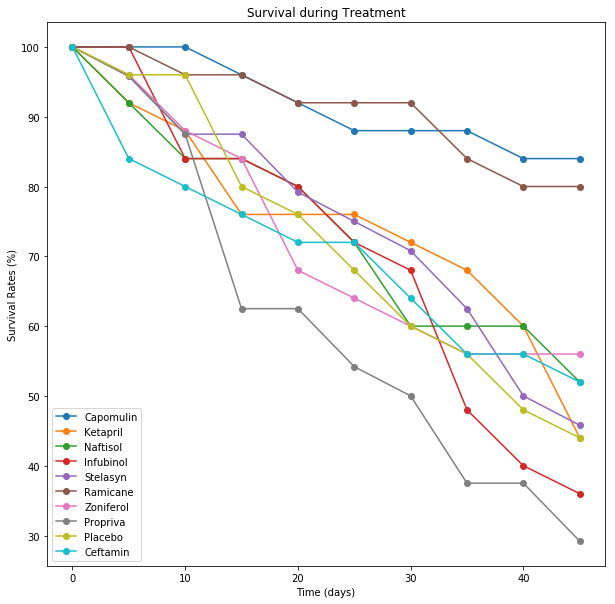

In [33]:
# Generate the Plot (Accounting for percentages)
fig, ax3 = plt.subplots(figsize=(10,10))
x_axis3 = np.arange(0, len(survival_rate_pct)*5, 5)

for x in drug_names:
    ax3.plot(x_axis3, survival_rate_pct[x], marker = "o")

ax3.set_title("Survival during Treatment")
ax3.set_xlabel("Time (days)")
ax3.set_ylabel("Survival Rates (%)")
ax3.legend(loc="best")
# Save the Figure
plt.savefig("Survival_rates_by_drug.png")
# Show the Figure
plt.show()


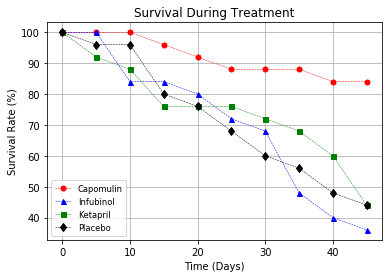

## Summary Bar Graph

In [45]:
# Calculate the percent changes for each drug
tumor_start = tumor_summary.iloc[0,:]
tumor_end = tumor_summary.iloc[-1,:]
tumor_change_pct = []
for x in drug_names:
    tumor_change_pct.append(round(100*(tumor_end[x]-tumor_start[x])/tumor_start[x], 1))
    
# Display the data to confirm
print(f"{tumor_change_pct}")


[-19.5, 57.0, 53.9, 46.1, 52.1, -22.3, 46.6, 47.2, 51.3, 42.5]


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

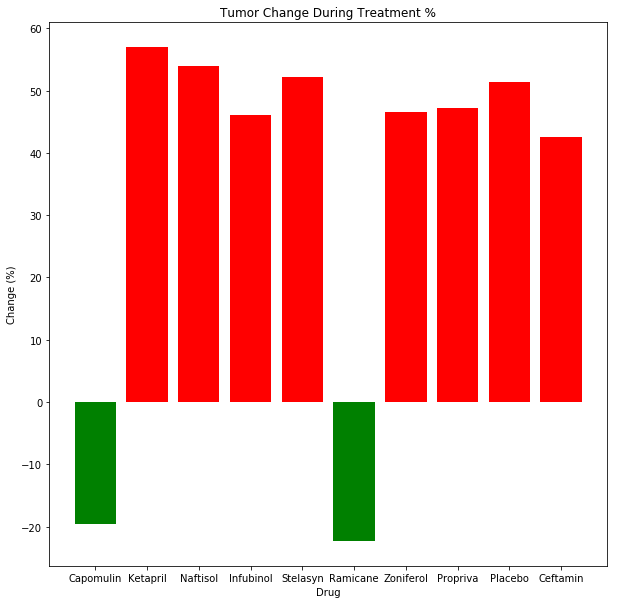

In [87]:
# Store all Relevant Percent Changes into a Tuple
pct_change_drug = pd.DataFrame(tumor_change_pct, drug_names)

# Splice the data between passing and failing drugs
#failing_df = pct_change_drug.loc[pct_change_drug[0]>=0,:]
#passing_df = pct_change_drug.loc[pct_change_drug[0]<0,:]
#create bar color list
bar_color = []
for x in range(len(tumor_change_pct)):
    if tumor_change_pct[x] <0:
        bar_color.append('g')
    else:
        bar_color.append('r')
# Orient widths. Add labels, tick marks, etc. 
fig, ax4 = plt.subplots(figsize=(10,10))
x_axis4 = np.arange(len(drug_names))
ax4.bar(x_axis4, tumor_change_pct, color=bar_color, align="center")
tick_locations = [value for value in x_axis4]
ax4.set_xticks(tick_locations)
ax4.set_xticklabels(drug_names)
ax4.set_title("Tumor Change During Treatment %")
ax4.set_xlabel("Drug")
ax4.set_ylabel("Change (%)")

# Use functions to label the percentages of changes


# Save the Figure
plt.savefig("TumorChangePct.png")
# Show the Figure
fig.show()

In [92]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
        
# Call functions to implement the function calls
autolabel(tumor_change_pct, ax4)

AttributeError: 'numpy.float64' object has no attribute 'get_height'